In [1]:
import pandas as pd 
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./boston.csv') #, columns=data.feature_names)

In [3]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [6]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [7]:
X_train.corr().columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

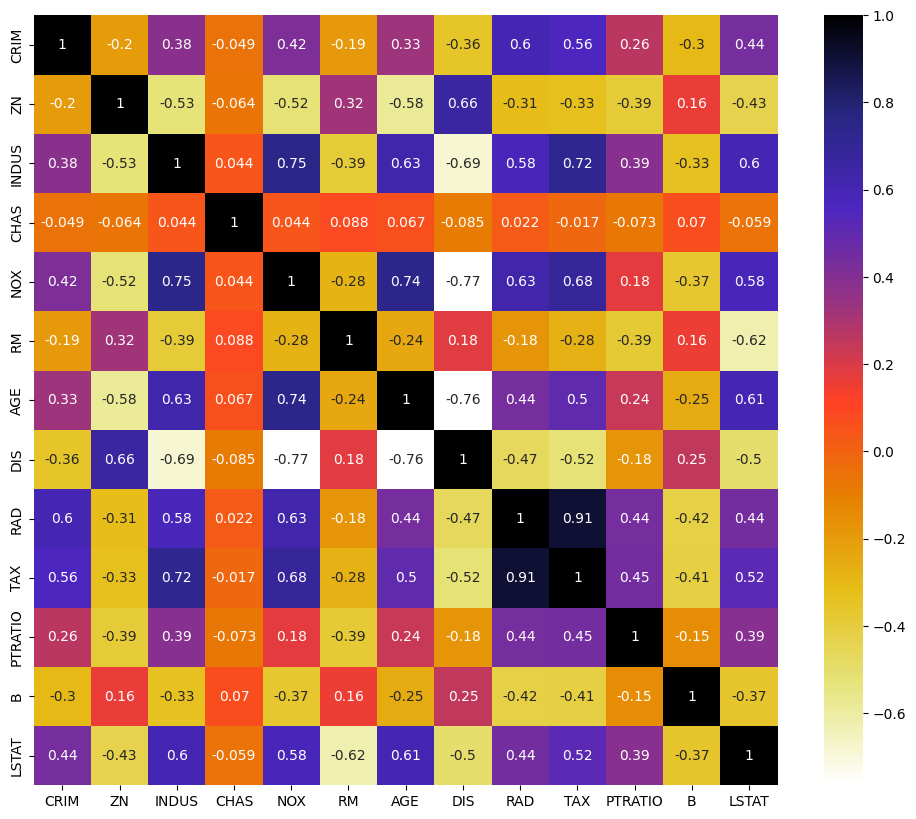

In [8]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor= X_train.corr()
sbn.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [10]:
corr_features = correlation(X_train, 0.7)

In [11]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [12]:
X_train.shape

(354, 13)

In [13]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0,6.333,4,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,6.216,24,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,6.373,5,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,5.349,24,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,6.232,5,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0,7.147,3,18.7,396.90,5.33
428,7.36711,0.0,18.10,0,6.193,24,20.2,96.73,21.52
385,16.81180,0.0,18.10,0,5.277,24,20.2,396.90,30.81
308,0.49298,0.0,9.90,0,6.635,4,18.4,396.90,4.54


In [14]:
url = "https://www.kaggle.com/competitions/santander-customer-satisfaction/data?select=train.csv"
df = pd.read_csv('santander.csv', nrows = 10000)
y = df['TARGET']
X = df.drop(labels=['TARGET'], axis=1)


# split dataset - train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

<AxesSubplot: >

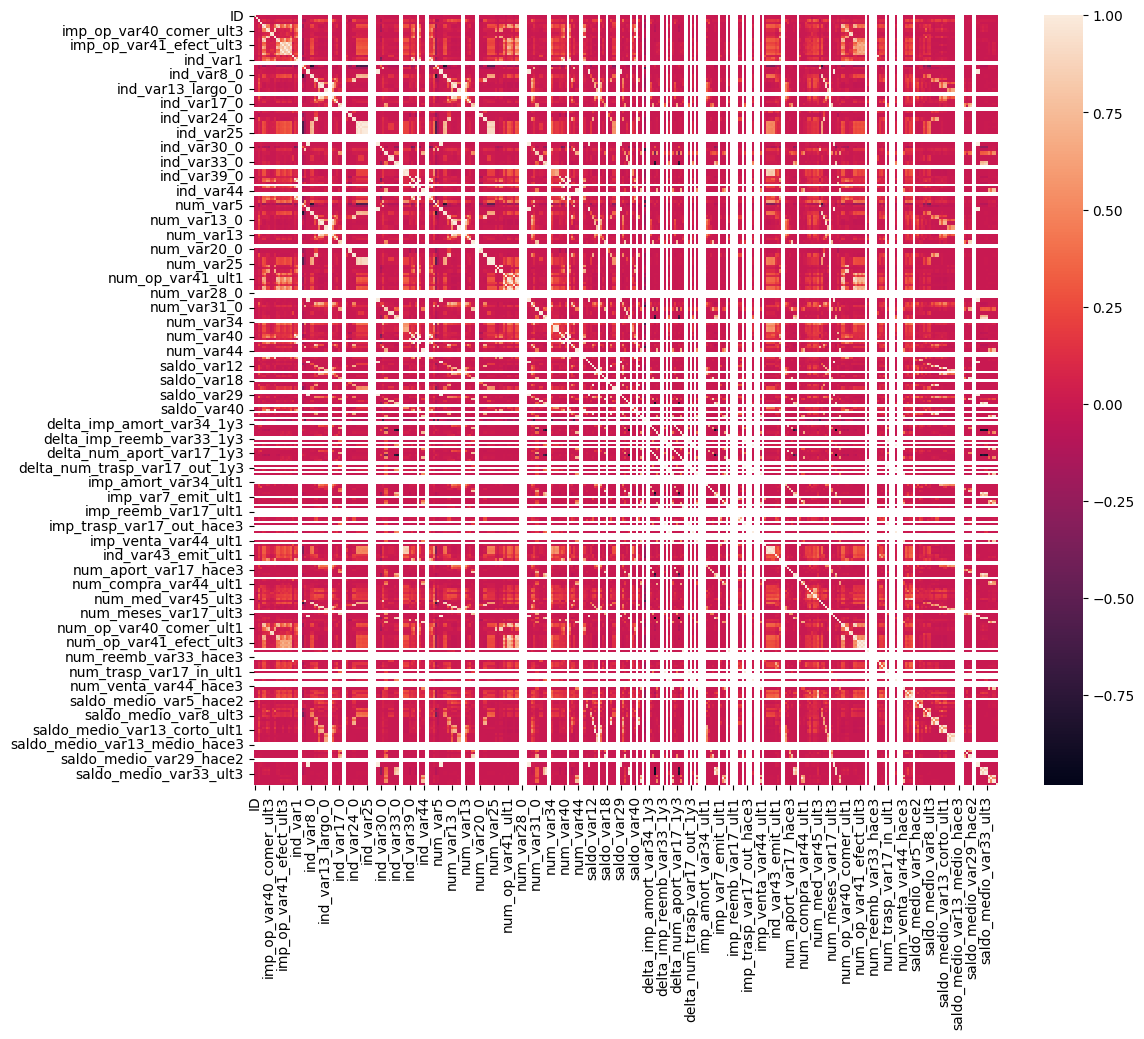

In [15]:
#Using pearson correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
sbn.heatmap(corrmat)

In [17]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

156

In [19]:
X_train.shape

(7000, 370)

In [18]:
X_train.drop(corr_features, axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,4477.02,...,0,0,0,0,0.0,0.0,0.0,0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,52.32,...,0,0,0,0,0.0,0.0,0.0,0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,86412.15
